In [3]:
import matplotlib.pyplot as plt
import numpy as np, pickle, cv2
from process import *

root = "/home/kavra/Datasets/medical/cvi_eyetracking/asc_data_v1/"
# TODO: Perform Mann-Whitney test on CVI - ctrl
# first fix grad, test functionality and share

In [14]:
img = plt.imread("trials/Trial_61/Freeviewingstillimage_12.jpg")

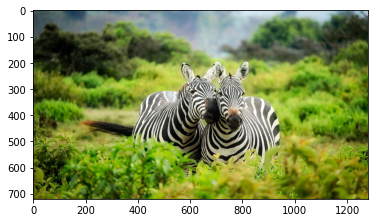

/home/kavra/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kavra/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loaded pretrained weights for efficientnet-b5


Using cache found in /home/kavra/.cache/torch/hub/pytorch_vision_v0.6.0
/home/kavra/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using cache found in /home/kavra/.cache/torch/hub/pytorch_vision_v0.6.0
/home/kavra/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


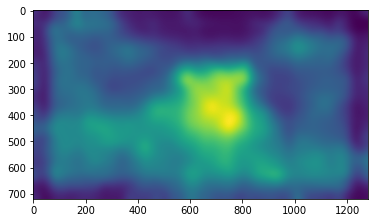

In [19]:
plt.imshow(img)
plt.show()
plt.imshow(smap_deepgaze(img))
plt.show()

In [11]:
sub0 = Subject(root, "1003_3")
data0, fr0 = sub0.extract_data(trial, vel=False)
out = sub0.extract_saccades(trial_name=trial)

In [5]:
fix_analyzer = FixationAnalyzer(root, out)
a = fix_analyzer.fixation_map(trial)

In [6]:
ids = [i for i in os.listdir(root) if i.endswith('.asc')]
ctrl_ids = [i.split(".")[0] for i in ids if i.split('_')[0].startswith("2")]
cvi_ids = [i.split(".")[0] for i in ids if i not in ctrl_ids]

durations_ctrl = []
for subject in ctrl_ids:
    sub = Subject(root, subject)
    out = sub.extract_fixations(trial_name=trial)
    fix_analyzer = FixationAnalyzer(root, out)
    dur = fix_analyzer.number_of_fixations()
    durations_ctrl.append(dur)

durations_cvi = []
for subject in cvi_ids:
    sub = Subject(root, subject)
    out = sub.extract_fixations(trial_name=trial)
    fix_analyzer = FixationAnalyzer(root, out)
    dur = fix_analyzer.number_of_fixations()
    durations_cvi.append(dur)

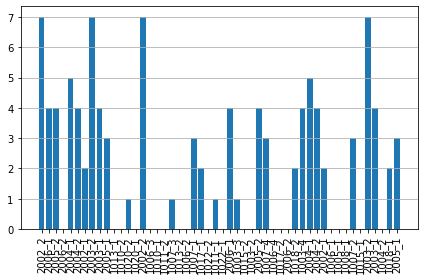

In [34]:
names = ctrl_ids + cvi_ids
t = list(range(len(names)))

plt.bar(t, durations_ctrl + durations_cvi)
plt.xticks(t, names, rotation=90)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [7]:
from scipy.stats import ttest_ind

print(np.mean(durations_cvi), np.mean(durations_ctrl))

stat, p_value = ttest_ind(durations_ctrl, durations_cvi)
print(p_value)

1.575 4.0
0.0015258557743406044


In [1]:
import pandas as pd

bboxes = pd.read_csv("object_bboxes.csv")

In [22]:
new = pd.DataFrame(columns=["image", "x", "y", "width", "height"])

In [ ]:
import json
new = {
    "image": [],
    "x": [],
    "y": [],
    "width": [],
    "height": [],
}
for i, row in bboxes.iterrows():
    new["image"].append(row["image"].split("/")[-1].split("-")[-1])

    row = json.loads(row["label"].strip("[]"))
    new["x"].append(row["x"])
    new["y"].append(row["y"])
    new["width"].append(row["width"])
    new["height"].append(row["height"])

pd.DataFrame(new).to_csv("obj_bboxes.csv")

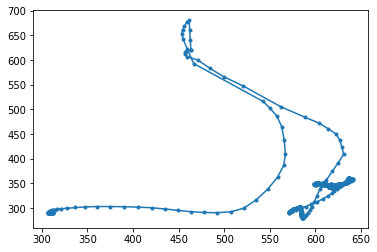

In [12]:
plt.plot(data0[:, 0], data0[:, 1], marker=".");

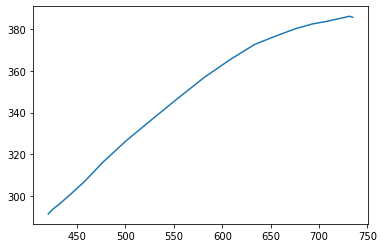

In [42]:
plt.plot(out[0]["data"][:, 0], out[0]["data"][:, 1]);

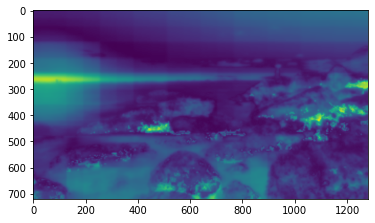

In [40]:
smap = np.load(os.path.join("output/extra", "saliency_maps", trial[:-4], trial[:-4] + "_color.npy"))
smap = (smap - np.min(smap))/(np.max(smap) - np.min(smap))
plt.imshow(smap);